### Has the network latency gone up since we switched internet service providers?

    $H_0$: Network latency has not changed since switching ISPs. Bandwidth and the network's efficiency in using it are the same. The network crashes at the same rate as it did before; upload and download speeds have not changed.

    $H_a$: Network latency has changed since switching ISPs. Bandwidth has either increased or decreased, and the network's efficiency in using it has either increased or decreased. The network crashes either less than it did before or more than it did before; upload and download speeds have either increased or decreased.

    * True positive: Null hypothesis ("Network latency has not changed...") was rejected and it was found that, by the above mentioned criteria, network latency has changed. Bandwidth increased (or decreased), the network's efficiency in using available bandwidth increased (or decreased), the network crashes less(or more) than it did before the ISP switch, and/or upload and download speeds are faster (or slower).

    * True negative: Null hypothesis was accepted and no change was found in network latency. All conditions with regard to network latency remain the same as before the ISP switch.

    * False positive: Null hypothesis was rejected, but there was no actual change in network latency.
    * False negative: Null hypothesis was accepted, but there was real change in network latency.


### Is the website redesign any good?

    - Null hypothesis: There has been no noticeable change in the website's performance since its redesign. UX ratings are the same as before the redesign. The number of catastrophic errors remains the same. The site's traffic has not increased.

    - Alternative hypothesis: The website is performing better since its redesign. UX ratings are higher. The number of catastrophic errors has decreased. Site traffic has significantly increased.

        * True positive: Null hypothesis rejected. Website redesigned deemed good based on noted improvement in above mentioned criteria.
        * True negative: Null hypothesis accepted. No notable change in the website's performance since its redesign.
            ** (What if website performance is worse since redesign???)
        * False positive: Null hypothesis rejected, but website performance remains the same (or worse).
        * False negative: Null hypothesis accepted, but website performance has improved.

### Is our television ad driving more sales?
   
    - Null hypothesis: Sales have remained the same since the release of the TV ad. There has been no ROI.
    - Alternative hypothesis: Sales have either increased or decreased since the release of the TV ad. There is either a significant, positive ROI or a net loss in revenue directly associable with the release of the ad.
        * True positive: Null hypothesis rejected and notable increase or decrease in sales, reflected in net gain or loss in revenue subsequent to release of ad.
        * True negative: Null hypothesis accepted. No change in sales noted; no ROI.
        * False positive: Null hypothesis rejected, but no change in sales and 0 ROI.
        * False negative: Null hypothesis accepted, but increase or decrease in sales noted. Net gain or loss in revenue since release of ad.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from pydataset import data
from env import get_db_url

np.random.seed(123)


Text(0.5, 0, 'Sell time')

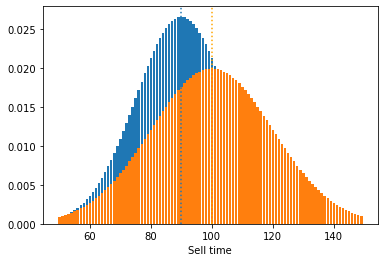

In [2]:
office_one_sales = 40
office_one_avg = 90
office_one_std = 15
office_two_sales = 50
office_two_avg = 100
office_two_std = 20

x = np.arange(50,150)

ofc_one_selltime = stats.norm(office_one_avg, office_one_std).pdf(x)
ofc_two_selltime = stats.norm(office_two_avg, office_two_std).pdf(x)

# H0: There is no difference between the average sales times of office 1 and office 2
# Ha: Office 1's average sales time is not equal to Office 2's average sales time. 

plt.bar(x, ofc_one_selltime)
plt.bar(x, ofc_two_selltime)
plt.axvline(90, ls= ':')
plt.axvline(100, ls= ':', color= 'orange')
plt.xlabel('Sell time')

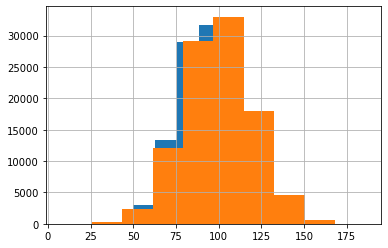

In [4]:
ofc1= pd.Series(stats.norm(office_one_avg, office_one_std).rvs(100000)).hist()
ofc2= pd.Series(stats.norm(office_two_avg, office_two_std).rvs(100000)).hist()



In [3]:
alpha = 0.05

tstat, pval = stats.ttest_1samp(ofc_one_selltime.any(), ofc_two_selltime.any())

tstat.mean(), pval.mean(), alpha

# Ron Guey


/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan, 0.05)

In [140]:
if pval < alpha:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [141]:
tstat, pval = stats.ttest_ind_from_stats(office_one_sales, office_one_avg, office_one_std, office_two_sales, office_two_avg, office_two_std, equal_var= False)

tstat, pval, alpha

# Rait Guey

(-0.31008683647302115, 0.7585165042546953, 0.05)

In [142]:
if pval < alpha:
    print ('We can reject the null hypothesis.')
else: 
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Are compact cars more fuel-efficient than the average car?

- Do manual cars get better gas mileage than automatic cars?

In [32]:
mpg = data('mpg')

In [74]:
mpg.head()
mpg['avg_mileage'] = (mpg.hwy + mpg.cty) / 2

cars_2008 = mpg[mpg.year == 2008]
cars_1999 = mpg[mpg.year == 1999]

mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [76]:
fuel_eff_2008 = cars_2008.avg_mileage.mean()
fuel_eff_1999 = cars_1999.avg_mileage.mean()

print(f'2008 average fuel efficiency is {fuel_eff_2008}.')
print(f'1999 average fuel efficiency is {fuel_eff_1999}.')

2008 average fuel efficiency is 20.076923076923077.
1999 average fuel efficiency is 20.22222222222222.


H0: There is no difference in fuel efficiency between cars in 2008 and 1999.

Ha: Fuel efficiency in 2008 cars > Fuel efficiency in 1999 cars.

In [85]:
cars_2008.avg_mileage.var()
cars_1999.avg_mileage.var()
alpha = 0.05
tstat, pval = stats.ttest_ind(cars_2008.avg_mileage, cars_1999.avg_mileage, equal_var=False)

tstat, pval / 2, alpha


(-0.21960177245940962, 0.4131875386030319, 0.05)

In [86]:
if pval / 2 < alpha and tstat > 0:
    print ('We reject the null hypothesis.')
else:
    print ('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


In [2]:
mpg.rename(columns= {'class': 'car_class'}, inplace= True)
mpg.head()

compact_cars = mpg[mpg.car_class == 'compact']

NameError: name 'mpg' is not defined

H0: There is no difference between compact car fuel efficiency and average car fuel efficiency

Ha: Compact car fuel efficiency > average car fuel efficiency

In [126]:

print(f'Average compact car fuel efficiency: {compact_cars.avg_mileage.mean()}')
print(f'Average car fuel efficiency: {mpg.avg_mileage.mean()}')


Average compact car fuel efficiency: 24.21276595744681
Average car fuel efficiency: 20.14957264957265


In [96]:
alpha = 0.05

tstat, pval = stats.ttest_1samp(compact_cars.avg_mileage, mpg.avg_mileage.mean())

if pval / 2 < alpha and tstat > 0:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


In [101]:
auto_trans_cars = mpg[mpg.trans.str.startswith('a')]
manual_trans_cars = mpg[mpg.trans.str.startswith('m')]

H0: There is no difference in average fuel efficiency between cars with automatic transmissions and cars with manual transmissions.
Ha: Cars with manual transmissions have better fuel efficiency than cars with automatic transmissions.


In [103]:
print(f'Do manual transmissions have better fuel efficiency? {manual_trans_cars.avg_mileage.mean() > auto_trans_cars.avg_mileage.mean()}')
print(f'Is variance in average fuel efficiency between manual transmission cars and automatic transmission cars equal? {manual_trans_cars.avg_mileage.var() == auto_trans_cars.avg_mileage.var()}')

Do manual transmissions have better fuel efficiency? True
Is variance in average fuel efficiency between manual transmission cars and automatic transmission cars equal? False


In [130]:
print(f'Manual transmission avg fuel eff variance is: {manual_trans_cars.avg_mileage.var()}')
print(f'Automatic transmission avg fuel eff variance is : {auto_trans_cars.avg_mileage.var()}')

print(f'Levene says:{stats.levene(manual_trans_cars.avg_mileage, auto_trans_cars.avg_mileage)}, and since the pvalue is > alpha, we cannot reject the null hypothesis relative to variance that it is equal between the respective samples.')

Manual transmission avg fuel eff variance is: 26.635167464114826
Automatic transmission avg fuel eff variance is : 21.942777233382337
Levene says:LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857), and since the pvalue is > alpha, we cannot reject the null hypothesis relative to variance that it is equal between the respective samples.


In [131]:
tstat, pval = stats.ttest_ind(manual_trans_cars.avg_mileage, auto_trans_cars.avg_mileage)

tstat, pval / 2, alpha

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [132]:
if pval / 2 < alpha and tstat > 0:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We can reject the null hypothesis.


### Correlation exercises

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [151]:
url = get_db_url('telco_churn')
pd.read_sql('SHOW TABLES', url)
telco_data = pd.read_sql('SELECT * FROM customers', url)
telco_data.head()
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

### Hypotheses:

H0: There is no significant correlation (r <= -0.5 or r >= 0.5) between tenure and monthly charges in the telco churn data.

Ha: There is significant correlation (r <= -0.5 or r >= 0.5) between tenure and monthly charges in the telco churn data.

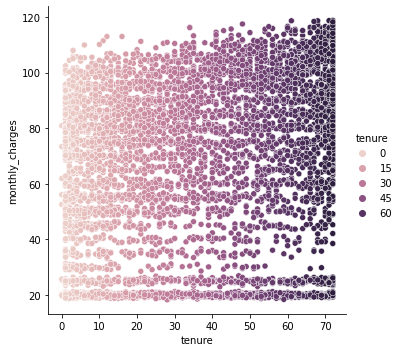

In [163]:
sns.relplot(x=telco_data.tenure, y=telco_data.monthly_charges, hue= x)

In [152]:
r_coeff, pval = stats.pearsonr(telco_data.tenure, telco_data.monthly_charges)

r_coeff, pval, alpha

(0.24789985628615263, 4.0940449914811555e-99, 0.05)

In [160]:
if pval < alpha and abs(r_coeff) > 0.5:
        print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


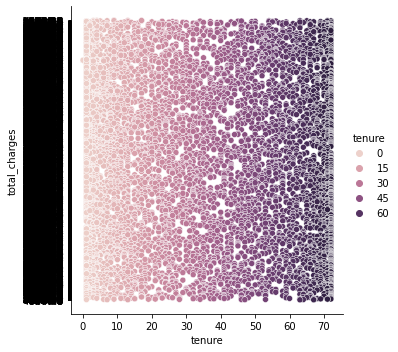

In [165]:
sns.relplot(x= telco_data.tenure, y=telco_data.total_charges, hue= x)

In [190]:
# telco_data.total_charges contains strings not floats -- and, of course, it's not the right database, but whatevs...
# Try Spearman?
# r_coeff, pval = stats.pearsonr(telco_data.tenure, telco_data.total_charges.astype('float'))

r_coeff, pval = stats.spearmanr(telco_data.tenure, telco_data.total_charges)

r_coeff, pval, alpha

(0.1335958253944717, 2.062335511455103e-29, 0.05)

In [205]:
telco_data['total_charges_num'] = telco_data.total_charges.str.strip()
type(telco_data.total_charges_num)
telco_data.total_charges_num.str.lstrip()
telco_data.total_charges_num.str.rstrip()
telco_data.total_charges_num.isna().sum()
telco_data.total_charges_num.astype('float')

ValueError: could not convert string to float: ''

### ^^^ This will be a problem for another day. ^^^

Switching to downloaded csv (Cust_Churn_Telco)

In [206]:
cust_churn = pd.read_csv('Cust_Churn_Telco.csv')
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [207]:
cust_churn.TotalCharges.isna().sum()

11

In [209]:
cust_churn['total_charges'] = cust_churn.TotalCharges.fillna(cust_churn.TotalCharges.median())
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


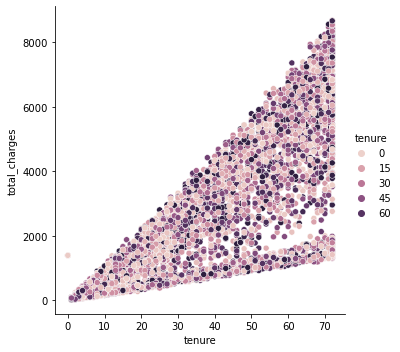

In [210]:
sns.relplot(x=cust_churn.tenure, y=cust_churn.total_charges, hue= x)

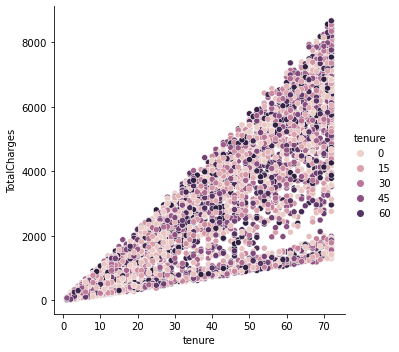

In [213]:
sns.relplot(x=cust_churn.tenure, y=cust_churn.TotalCharges, hue= x)

### Hypotheses:

$H_0$: There is no significant correlation (r <= -0.5 or r >= 0.5) between tenure and total charges in the telco churn data.

$H_a$: There is significant correlation (r <= -0.5 or r >= 0.5) between tenure and total charges in the telco churn data.

In [212]:
r_coeff, pval = stats.pearsonr(cust_churn.tenure, cust_churn.total_charges)

r_coeff, pval, alpha

(0.8254640864073084, 0.0, 0.05)

In [220]:
if pval < alpha and abs(r_coeff) > 0.5:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We can reject the null hypothesis.


Control for phone and internet service

In [214]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [239]:
cust_churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

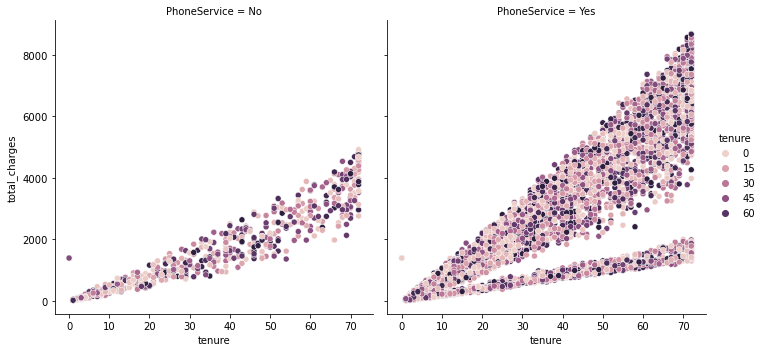

In [223]:
sns.relplot(x=cust_churn.tenure, y=cust_churn.total_charges, col=cust_churn.PhoneService, hue= x)

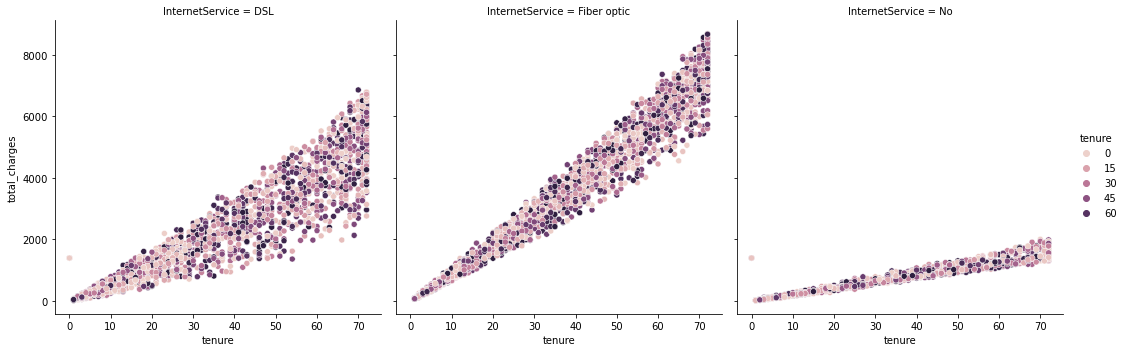

In [224]:
sns.relplot(x= cust_churn.tenure, y= cust_churn.total_charges, col= cust_churn.InternetService, hue= x)

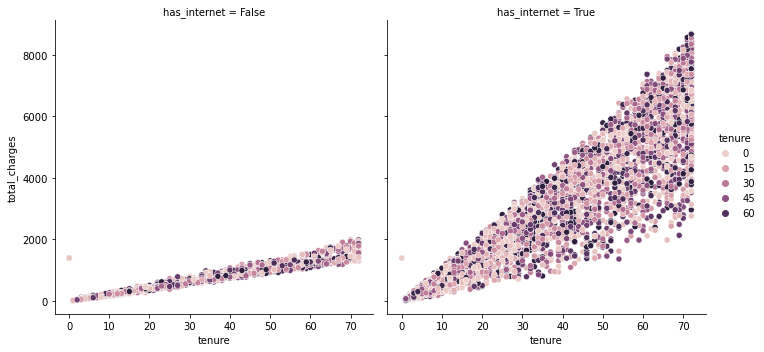

In [229]:
cust_churn['has_internet'] = cust_churn.InternetService != 'No'

cust_churn.head()
sns.relplot(x= cust_churn.tenure, y=cust_churn.total_charges, col= cust_churn.has_internet, hue= x)

In [246]:
does_hasnet = cust_churn[cust_churn.InternetService !=  'No']
dont_hasnet = cust_churn[cust_churn.InternetService == 'No']

does_hasnet.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges,has_internet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,True


In [247]:
dont_hasnet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges,has_internet
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,326.80,False
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,1022.95,False
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,202.25,False
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,20.15,False
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,20.20,False


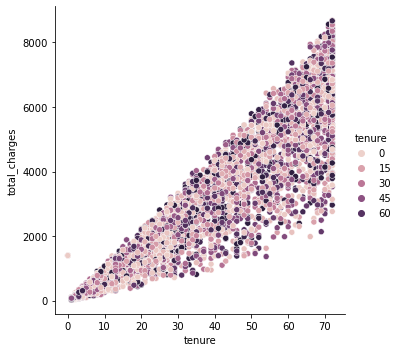

In [249]:
sns.relplot(data= does_hasnet, x= does_hasnet.tenure, y=does_hasnet.total_charges, hue= x)

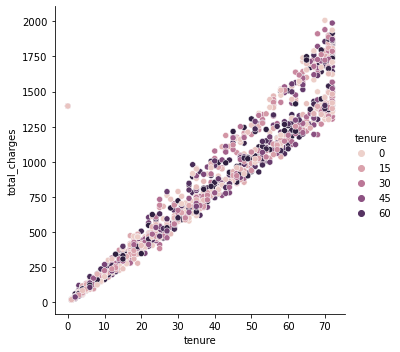

In [250]:
sns.relplot(data= dont_hasnet, x= dont_hasnet.tenure, y=dont_hasnet.total_charges, hue= x)

### Hypotheses:

H0: There is no significant correlation (r <= -0.5 or r >= 0.5) between tenure and total charges in the telco data, controlling for internet service.

Ha: There is significant correlation between tenure and total charges in the telco data, controlling for internet service.

In [248]:
r_coeff, pvalue = stats.pearsonr(does_hasnet.tenure, does_hasnet.total_charges)

r_coeff, pvalue, alpha

(0.931729340020184, 0.0, 0.05)

In [251]:
if pvalue < alpha and abs(r_coeff) > 0.5:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We can reject the null hypothesis.


### 2. Use the employees database.

- Is there a relationship between how long an employee has been with the company and their salary?

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [14]:
url = get_db_url('employees')
pd.read_sql('SHOW TABLES', url)
pd.read_sql('DESCRIBE titles', url)
employees_df = pd.read_sql(
    '''SELECT DATEDIFF ((SELECT MAX(hire_date) FROM employees), employees.hire_date) AS tenure, salaries.salary as salary 
    FROM employees JOIN salaries ON salaries.emp_no = employees.emp_no 
    WHERE salaries.to_date > CURDATE()''', 
    url)
employees_df.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [13]:
r_coeff, pval = stats.pearsonr(x=employees_df.tenure, y=employees_df.salary)

r_coeff, pval, alpha

(0.30646256131860894, 0.0, 0.05)

### Mini exercise: Is Attrition independent from Department?

$H_0:$ There is no difference in Attrition in relation to Department.

$H_a:$ There is a difference in Attrition in relation to Department

In [15]:
biz_df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")
biz_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
observed = pd.crosstab(biz_df.Attrition, biz_df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [17]:
chi2, pval, dof, expected = stats.chi2_contingency(observed)

chi2, pval, dof, expected

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

### $\chi^2$ Exercises

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [ ]:
use_macbook = ['Uses a Macbook', 'Doesn\'t Use a Macbook']
student_status = ['Codeup Student', 'Not Codeup Student']
cu_comp_users = pd.DataFrame({})